In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

In [4]:
path_to_zip

'/home/kdd/.keras/datasets/cats_and_dogs.zip'

In [5]:
os.path.dirname(path_to_zip)

'/home/kdd/.keras/datasets'

In [6]:
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [7]:
PATH

'/home/kdd/.keras/datasets/cats_and_dogs_filtered'

In [8]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [9]:
train_dir

'/home/kdd/.keras/datasets/cats_and_dogs_filtered/train'

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [11]:
len(os.listdir(train_cats_dir))

1000

## Understand the data

In [12]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [13]:
print('total training cat images: ', num_cats_tr)
print('total training dog images: ', num_dogs_tr)
print('total validation cat images: ', num_cats_val)
print('total validation dog images: ', num_dogs_val)
print('--'*30)
print('total training images: ', total_train)
print('total validation images: ', total_val)

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
------------------------------------------------------------
total training images:  2000
total validation images:  1000


In [14]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Data preparation

In [21]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [22]:
train_image_generator

In [23]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=[IMG_HEIGHT, IMG_WIDTH],
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [24]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=[IMG_HEIGHT, IMG_WIDTH],
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


## Visualize training images

In [26]:
sample_training_images, _ = next(train_data_gen)

In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

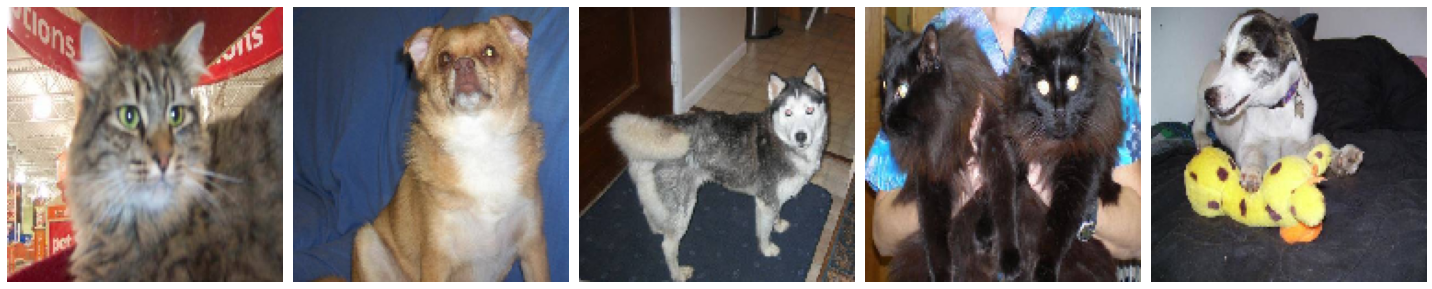

In [30]:
plotImages(sample_training_images[:5])

# Create the model

In [36]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1) # why not 2?
])

## Compile the model

In [37]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

## Model summary

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

## Train the model

In [39]:
history = model.fit_generator(train_data_gen,
                             steps_per_epoch=total_train // batch_size,
                             epochs=epochs,
                             validation_data=val_data_gen,
                             validation_steps=total_val // batch_size)


Epoch 1/15
15/15 [==============================] - 24s 2s/step - loss: 0.9601 - accuracy: 0.5214 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 24s 2s/step - loss: 0.6854 - accuracy: 0.5118 - val_loss: 0.6704 - val_accuracy: 0.5078
Epoch 3/15
15/15 [==============================] - 22s 1s/step - loss: 0.6535 - accuracy: 0.5438 - val_loss: 0.6397 - val_accuracy: 0.6071
Epoch 4/15
15/15 [==============================] - 22s 1s/step - loss: 0.6177 - accuracy: 0.6464 - val_loss: 0.6086 - val_accuracy: 0.6652
Epoch 5/15
15/15 [==============================] - 23s 2s/step - loss: 0.6052 - accuracy: 0.6293 - val_loss: 0.6191 - val_accuracy: 0.6763
Epoch 6/15
15/15 [==============================] - 22s 1s/step - loss: 0.5147 - accuracy: 0.7388 - val_loss: 0.5828 - val_accuracy: 0.6786
Epoch 7/15
15/15 [==============================] - 22s 1s/step - loss: 0.4589 - accuracy: 0.7719 - val_loss: 0.5692 - val_accuracy: 0.7288
Epoch 8/15
15/15 [==

## Visualize training results

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

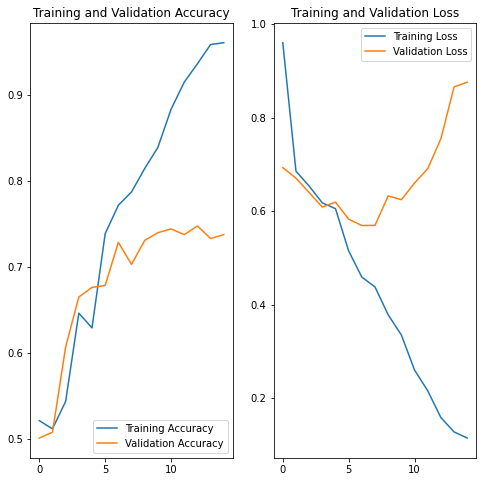

In [41]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 模型在训练集上的准确率与验证集上的准确率差别很大——Overfitting

# Data Augmentation

## Apply horizontal flip

In [42]:
# 水平翻转
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [44]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [58]:
print(train_data_gen[0][0][0].shape)

(150, 150, 3)


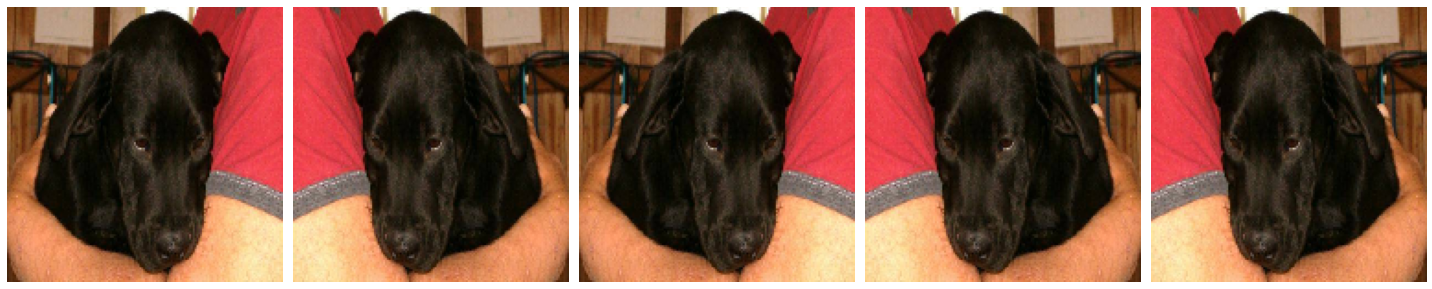

In [59]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [65]:
train_data_gen[0][1][0]

array([0., 1.], dtype=float32)

## Randomly rotate the image

In [66]:
# 随机旋转
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=45)

Found 2000 images belonging to 2 classes.


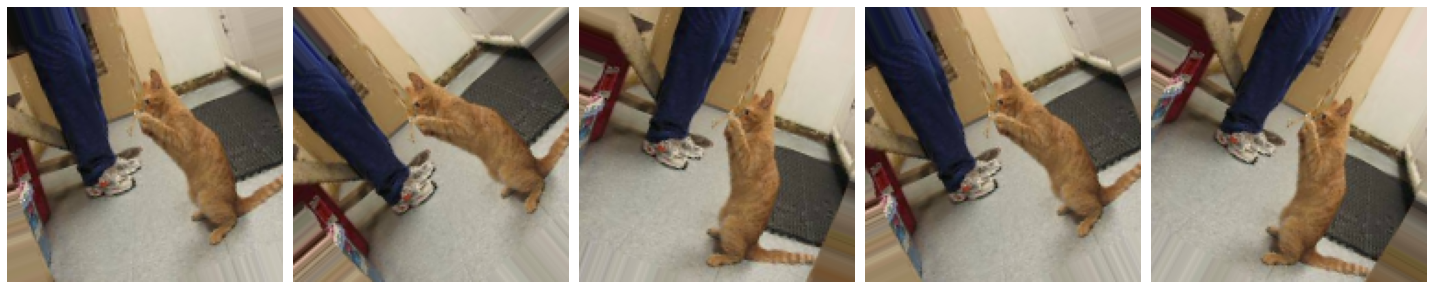

In [67]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Apply zoom augmentation

In [68]:
# 缩放图片
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, zoom_range=0.5)

Found 2000 images belonging to 2 classes.


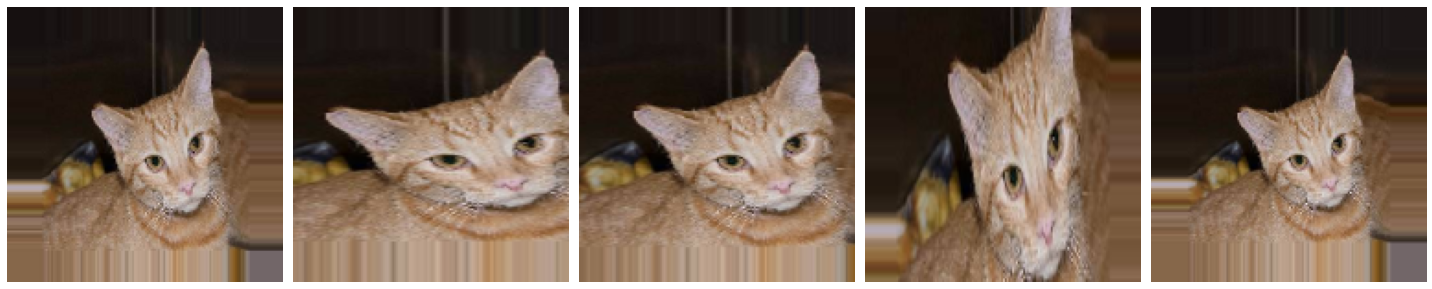

In [69]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Apply all augmentations

In [15]:
# 随即旋转45度，左右上下平移0.15倍，随即水平翻转，缩放0.5倍
image_gen_train = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               rotation_range=45,
                                                               width_shift_range=.15,
                                                               height_shift_range=.15,
                                                               horizontal_flip=True,
                                                               zoom_range=0.5)

Found 2000 images belonging to 2 classes.


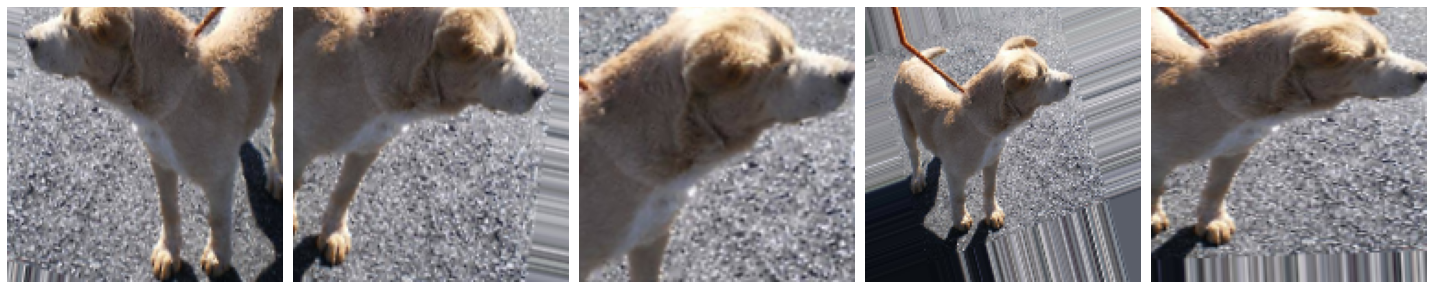

In [18]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Create validation data generator

In [19]:
image_gen_val = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [20]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Create a new network with Dropouts

In [21]:
model_new = keras.models.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

## Compile the model

In [22]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [23]:
history = model_new.fit_generator(train_data_gen,
                                  steps_per_epoch=total_train // batch_size,
                                  epochs=epochs,
                                  validation_data=val_data_gen,
                                  validation_steps=total_val // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 29s 2s/step - loss: 0.9512 - accuracy: 0.4698 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
15/15 [==============================] - 28s 2s/step - loss: 0.6921 - accuracy: 0.5011 - val_loss: 0.6918 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 27s 2s/step - loss: 0.6906 - accuracy: 0.5032 - val_loss: 0.6908 - val_accuracy: 0.4955
Epoch 4/15
15/15 [==============================] - 29s 2s/step - loss: 0.6911 - accuracy: 0.5016 - val_loss: 0.6860 - val_accuracy: 0.4989
Epoch 5/15
15/15 [==============================] - 27s 2s/step - loss: 0.6843 - accuracy: 0.4979 - val_loss: 0.6862 - val_accuracy: 0.6317
Epoch 6/15
15/15 [==============================] - 27s 2s/step - loss: 0.6834 - accuracy: 0.5187 - val_loss: 0.6797 - val_accuracy: 0.4989
Epoch 7/15
15/15 [==============================] - 27s 2s/step - loss: 0.6772 - acc

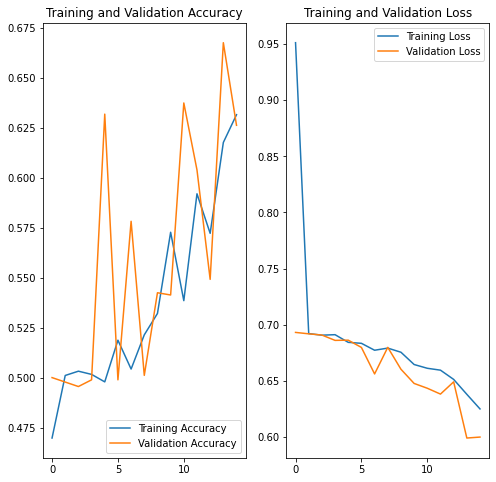

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()